In [184]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
savedir = "saved_models/clean_nonpersistent/"

In [191]:
training_samples = np.load(savedir + "training_samples.npy")
final_samples = np.load(savedir + "final_samples.npy").item()
variables = np.load(savedir + "variables.npy")

### Look at the trained weights

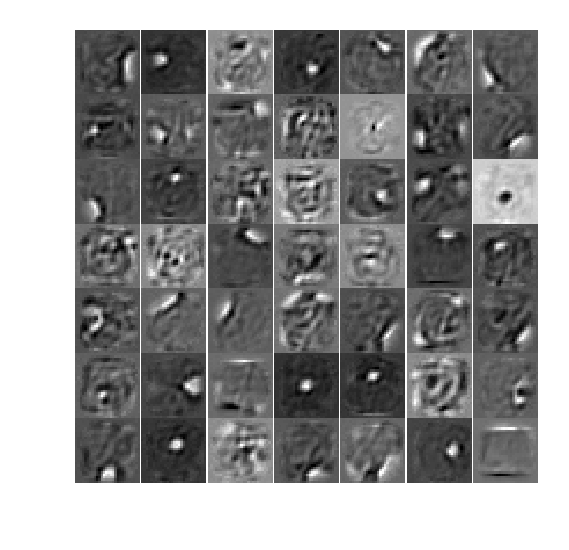

In [192]:
s=7
fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
for ii in range(s):
    for jj in range(s):
        ax = axes[ii,jj]
        w=np.reshape(variables[-1]['weights'][:,ii*s + jj], (28,28))
        ax.imshow(w, cmap='binary')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(savedir+"weights_examples.png")

## Look at samples produced by the trained model, when seeded by the dataset

In [198]:
samples_dataseed = np.reshape(final_samples['data_seed']['samples'], (-1, 28,28))
probs_dataseed = np.reshape(final_samples['data_seed']['probs'], (-1, 28,28))
probs_randseed = np.reshape(final_samples['random_seed']['probs'], (-1, 28,28))
samples_randseed = np.reshape(final_samples['random_seed']['samples'], (-1, 28,28))

In [195]:

def do_square_plot(images, s):
    fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
    for ii in range(s):
        for jj in range(s):
            ax = axes[ii,jj]
            image=images[ii*s + jj,...]
            ax.imshow(image, cmap='binary')
            ax.set_axis_off()
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, ax

In [196]:
s=7

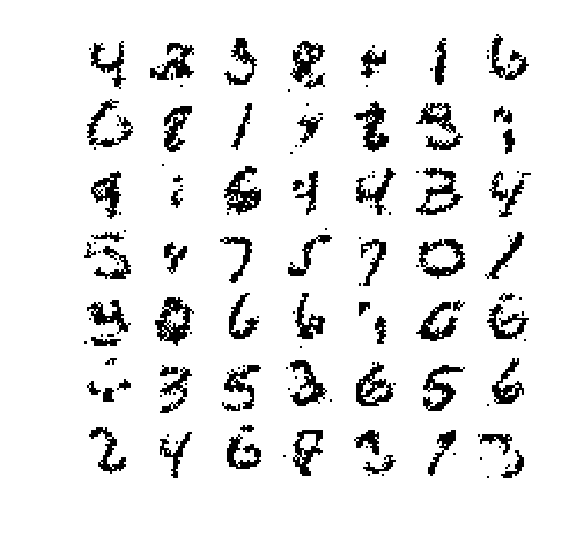

In [199]:
fig, ax = do_square_plot(samples_dataseed, s)
fig.savefig(savedir+"trained_samples_dataseed.png")

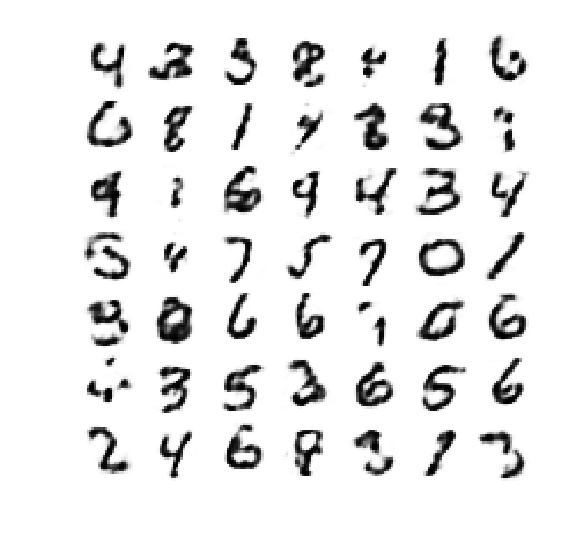

In [200]:
fig, ax = do_square_plot(probs_dataseed, s)
fig.savefig(savedir+"trained_probs_dataseed.png")

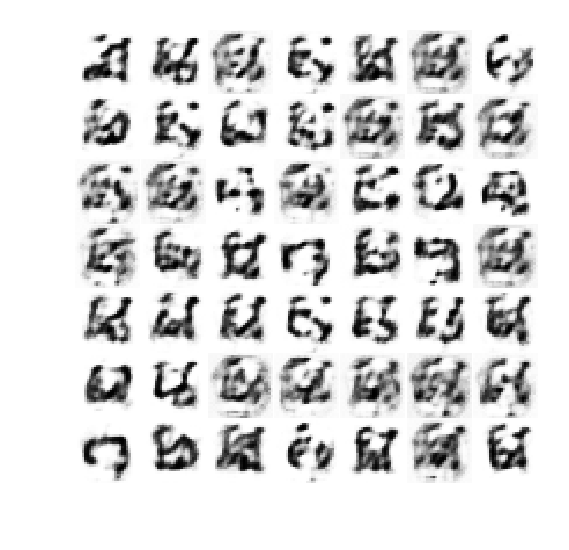

In [201]:
fig, ax = do_square_plot(probs_randseed, s)
fig.savefig(savedir+"trained_probs_randseed.png")

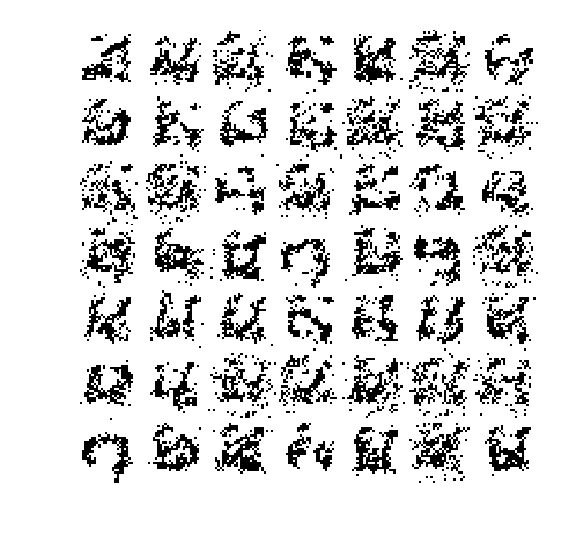

In [203]:
fig, ax = do_square_plot(samples_randseed, s)
fig.savefig(savedir+"trained_samples_randseed.png")